In [ ]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

In [ ]:
df = pd.read_csv("Sarah's Copy of ADHD.xlsx - Sheet1.csv")
df.head()

,PATIENT_ID,details,USER_ENTRY,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,weight prediction,32.2,NaN,NaN,NaN,NaN,weight in KG
1,2,actual weight,23.6,NaN,NaN,NaN,NaN,NaN
2,2,Age,5.0,NaN,NaN,NaN,NaN,NaN
3,2,weight prediction,23.1,NaN,NaN,NaN,NaN,NaN
4,3,actual weight,100.1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

# reshape data
df = df.pivot(index='PATIENT_ID', columns='details', values='USER_ENTRY')

# reset index
df.reset_index(inplace=True)

# rename columns
df.columns.name = None

print(df)

     PATIENT_ID   Age  actual weight  weight prediction
0             1   NaN            NaN               32.2
1             2   5.0           23.6               23.1
2             3  12.0          100.1              100.0
3             4   5.0           31.8               31.8
4             5   NaN            NaN               38.5
..          ...   ...            ...                ...
123         124  10.0           36.0               36.0
124         125  10.0           51.0               51.0
125         126  10.0           36.0               36.0
126         127  10.0           51.0               51.0
127         128  10.0           21.0               21.0

[128 rows x 4 columns]


In [ ]:
# check to see how many NA values we may have to drop"
display(df['actual weight'].isna().sum())
df['weight prediction'].isna().sum()

49

0

In [ ]:
df['actual weight'] = df['actual weight'].dropna()

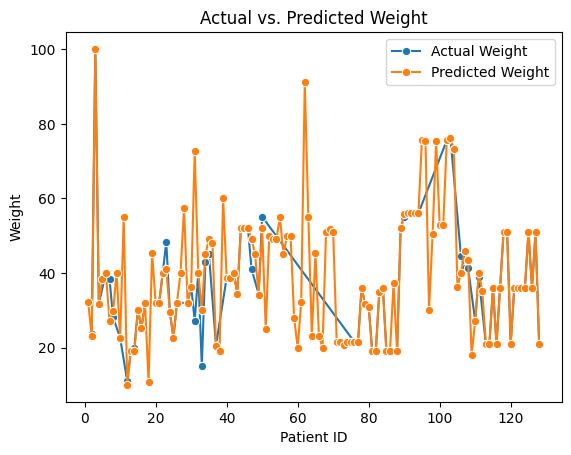

In [ ]:
sns.lineplot(x='PATIENT_ID', y='actual weight', data=df, label='Actual Weight', marker='o')

sns.lineplot(x='PATIENT_ID', y='weight prediction', data=df, label='Predicted Weight', marker='o')

plt.xlabel('Patient ID')
plt.ylabel('Weight')
plt.title('Actual vs. Predicted Weight')
plt.legend()
plt.show()

10.0    37
12.0    13
7.0      8
5.0      7
11.0     7
9.0      3
6.0      3
4.0      1
Name: Age, dtype: int64

Text(0.5, 1.0, 'Ages of Patients in Clinical Trial')

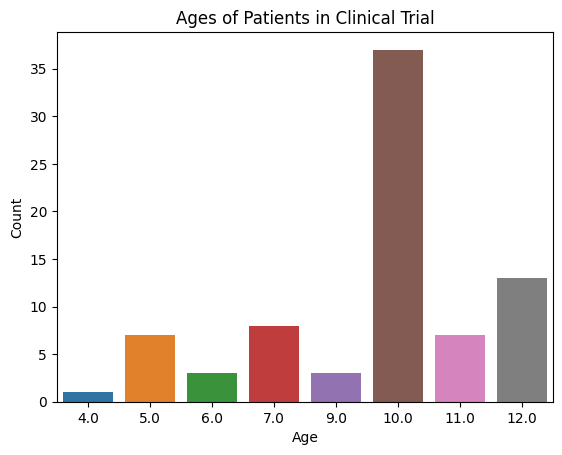

In [ ]:
display(df['Age'].value_counts())
sns.barplot(data = df, x = df['Age'].value_counts().index, y = df['Age'].value_counts())
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of Patients in Clinical Trial')

<Axes: xlabel='Age', ylabel='actual weight'>

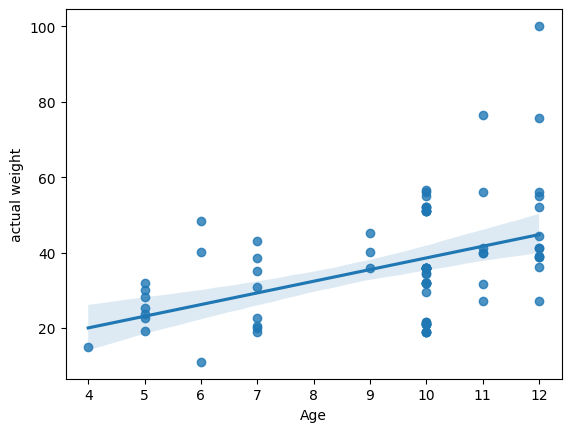

In [ ]:
sns.regplot(data = df, x = 'Age', y = 'actual weight')